In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import os

In [12]:
path='/content/drive/MyDrive/Satellite_Images_Dataset/'

In [13]:
print(os.listdir(path))

['water', 'desert', 'green_area', 'cloudy']


In [14]:
for i in os.listdir(path):
  print(i,len(os.listdir(path+i)))

water 1500
desert 1131
green_area 1500
cloudy 1500


In [21]:
import keras
import keras.utils as image
import matplotlib.pyplot as plt

In [22]:
img = image.load_img(path+'green_area/Forest_2986.jpg')

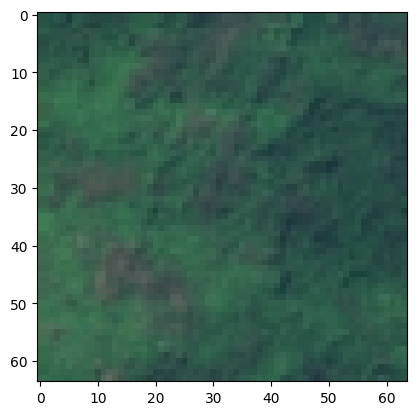

In [24]:
img = image.img_to_array(img)
plt.imshow(img/255)

In [25]:
from keras.preprocessing.image import ImageDataGenerator

In [26]:
train_X=ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True
)

In [27]:
train_gen=train_X.flow_from_directory(path,
                                      target_size=(250,250),
                                      batch_size=30,
                                      class_mode='categorical')

Found 5631 images belonging to 4 classes.


In [28]:
from keras.applications.resnet import ResNet101
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input,decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [29]:
resnet_model=ResNet101(weights='imagenet',include_top=False)

171446536/171446536 [==============================] - 1s 0us/step


In [30]:
resnet_model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                      

In [31]:
for layer in resnet_model.layers:
  layer.trainable=True

In [32]:
model_output=resnet_model.output
model_output=GlobalAveragePooling2D()(model_output)
model_output=Dense(1024,activation='relu')(model_output)
model_output=Dense(4,activation='softmax')(model_output)

In [33]:
model= Model(inputs=resnet_model.input,outputs=model_output)


In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [35]:
adam=keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy','Precision','Recall'])

In [ ]:
hist=model.fit(train_gen,epochs=30)

Epoch 1/30
188/188 [==============================] - 1503s 8s/step - loss: 0.4080 - accuracy: 0.8906 - precision: 0.9107 - recall: 0.8679
Epoch 2/30
188/188 [==============================] - 685s 4s/step - loss: 0.2603 - accuracy: 0.9339 - precision: 0.9374 - recall: 0.9309
Epoch 3/30
188/188 [==============================] - 683s 4s/step - loss: 0.1273 - accuracy: 0.9595 - precision: 0.9603 - recall: 0.9590
Epoch 4/30
188/188 [==============================] - 679s 4s/step - loss: 0.0542 - accuracy: 0.9810 - precision: 0.9815 - recall: 0.9806
Epoch 5/30
188/188 [==============================] - 681s 4s/step - loss: 0.0403 - accuracy: 0.9867 - precision: 0.9874 - recall: 0.9858
Epoch 6/30
188/188 [==============================] - 686s 4s/step - loss: 0.0798 - accuracy: 0.9773 - precision: 0.9774 - recall: 0.9769
Epoch 7/30
188/188 [==============================] - 688s 4s/step - loss: 0.0444 - accuracy: 0.9860 - precision: 0.9860 - recall: 0.9856
Epoch 8/30
188/188 [=============